In [1]:
import tensorflow as tf 

In [2]:
n1 = tf.constant(2)

In [3]:
n2 = tf.constant(3)

In [4]:
n3 = n1 + n2

In [5]:
sess = tf.InteractiveSession()

In [6]:
print(sess.run(n3))

5


In [7]:
print(tf.__version__)

1.9.0


In [8]:
hello = tf.constant("hello ")

In [9]:
world = tf.constant("world")

In [10]:
hello


<tf.Tensor 'Const_2:0' shape=() dtype=string>

In [13]:
with tf.Session() as sess:
    print(sess.run(hello + world))

b'hello world'


In [15]:
hello + world

<tf.Tensor 'add_3:0' shape=() dtype=string>

In [19]:
fill_mat = tf.fill((3,3), 3)

In [21]:
fill_mat

<tf.Tensor 'Fill_1:0' shape=(3, 3) dtype=int32>

In [22]:
myzeros = tf.zeros((2,2))

In [23]:
myones = tf.ones((2,2))

In [24]:
myrandn = tf.random_normal((3,3), 0, 1)

In [25]:
myrandu = tf.random_uniform((2,2), 1, 10)

In [26]:
ops = [fill_mat, myones, myrandn, myrandu, myzeros]

In [27]:
with tf.Session() as sess:
    for op in ops:
        print(sess.run(op))
        print("\n")
    

[[3 3 3]
 [3 3 3]
 [3 3 3]]


[[1. 1.]
 [1. 1.]]


[[-0.1546087   0.89031446 -0.37688023]
 [-1.2155983   1.5446461   0.6548664 ]
 [-0.468338    1.3361684   0.3579011 ]]


[[6.298682  5.9004583]
 [5.995642  1.1971552]]


[[0. 0.]
 [0. 0.]]




In [31]:
for op in ops:
    print(op.eval(), "\n")

[[3 3 3]
 [3 3 3]
 [3 3 3]] 

[[1. 1.]
 [1. 1.]] 

[[-0.72682387  0.8063031  -0.12750435]
 [-1.3751503  -0.98099244 -0.08934876]
 [ 1.5160185   0.2393465   1.815528  ]] 

[[1.3510014 1.8144099]
 [7.1983833 4.5858936]] 

[[0. 0.]
 [0. 0.]] 



In [39]:
print(myrandn.shape)
print(fill_mat.shape)

(3, 3)
(3, 3)


In [44]:
print(fill_mat.dtype)
print(myrandn.dtype)

<dtype: 'int32'>
<dtype: 'float32'>


In [47]:
res = tf.matmul(myrandn, tf.cast(fill_mat, tf.float32))

In [48]:
res.eval()

array([[ 3.0859685,  3.0859685,  3.0859685],
       [ 4.6946373,  4.6946373,  4.6946373],
       [-1.2490312, -1.2490312, -1.2490312]], dtype=float32)

In [50]:
res.get_shape()

TensorShape([Dimension(3), Dimension(3)])


**Graphs and sessions

In [51]:
print(tf.get_default_graph)

<function get_default_graph at 0x7f23e3fc21e0>


In [52]:
print(tf.get_collection)

<function get_collection at 0x7f23e3fc26a8>


In [53]:
print(tf.get_default_session)

<function get_default_session at 0x7f23e3fbc9d8>


In [55]:
with tf.Session() as sess:
    print(tf.get_default_session)

<function get_default_session at 0x7f23e3fbc9d8>


In [56]:
sess = tf.InteractiveSession()

/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [57]:
with tf.Session() as sess:
    print(tf.get_default_session)

<function get_default_session at 0x7f23e3fbc9d8>


In [58]:
g1 = tf.Graph()

In [59]:
print(g1)

In [51]:
print(tf.get_default_graph)

<function get_default_graph at 0x7f23e3fc21e0>


In [61]:
with g1.as_default():
    print(g1 is tf.get_default_graph())

True


In [63]:
print(g1 is tf.get_default_graph())

False


**Variables and Placeholders 
 

Variables need to be firstly initialized - using GlobalVariableInitializer. Placeholders are initially empty, but need to have a datatype with an optional shape argument

In [65]:
var1 = tf.Variable(initial_value=myrandu)

In [79]:
tf.InteractiveSession.close(sess)

In [80]:
print(sess)

In [81]:
sess = tf.InteractiveSession()

/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [83]:

sess.run(tf.global_variables_initializer())

In [85]:
var1.eval()

array([[6.3364906, 2.3565369],
       [1.5580121, 2.1938963]], dtype=float32)

In [94]:
ph1 = tf.placeholder(dtype=tf.float32, shape=((3,3)))
ph2 = tf.placeholder(dtype=tf.float32, shape=((None, None)))

In [95]:
y = tf.matmul(ph1, ph2)

In [101]:
x = [[2,1,3], [3,4,5], [5,4,3]]

In [102]:
import numpy as np

In [103]:
x1 = np.random.normal(0, 1, (3,3))

In [104]:
y.eval(feed_dict={ph1:x, ph2:x1})

array([[-0.6557511,  3.7188883,  2.7619803],
       [-1.5742096,  8.261962 ,  4.16649  ],
       [ 1.5164336,  5.2232914,  2.4745533]], dtype=float32)

In [114]:
with tf.Session() as sess:
    print(sess.run(y, feed_dict={ph1:x, ph2:x1}))

[[-0.6557511  3.7188883  2.7619803]
 [-1.5742096  8.261962   4.16649  ]
 [ 1.5164336  5.2232914  2.4745533]]


 **Example neural network
 z = w * x + b

In [117]:
n_features = 10
n_dense_neurons = 3

In [118]:
x = tf.placeholder(dtype=tf.float32, shape=(None, n_features))

In [121]:
w = tf.Variable(dtype=tf.float32, initial_value=tf.random_normal((n_features, n_dense_neurons)))

In [122]:
b = tf.Variable(initial_value=tf.ones((n_dense_neurons)))

In [123]:
b


<tf.Variable 'Variable_2:0' shape=(3,) dtype=float32_ref>

In [127]:
xw = tf.matmul(x,w)
xw.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'MatMul_7:0' shape=(?, 3) dtype=float32>>

In [128]:
z = tf.add(xw, b)
z.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Add_6:0' shape=(?, 3) dtype=float32>>

In [129]:
a = tf.sigmoid(z)

In [130]:
init = tf.global_variables_initializer()

In [133]:
sess = tf.InteractiveSession()

/home/student/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [134]:
sess.run(init)

In [141]:

layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})
# Also can do it like - a.eval(feed_dict={x:np.random.random([50,n_features])})

In [142]:
print(layer_out)

[[0.59535545 0.13717926 0.9952231 ]]


**Simple regression example

In [147]:
x_data = np.linspace(0,10,10) + np.random.uniform(-2, 2, 10)

In [223]:
y_label = np.linspace(0,5,10) + np.random.uniform(-1, 1, 10)

In [224]:
import matplotlib.pyplot as plt 
%matplotlib inline

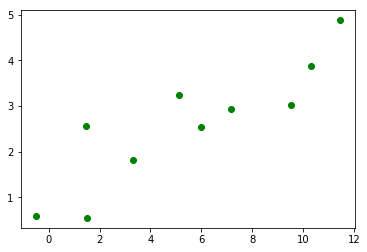

In [225]:
plt.plot(x_data, y_label, 'go')

y = mx + b

In [226]:
m = tf.Variable(np.random.random(1))

In [227]:
b = tf.Variable(np.random.random(1))

In [228]:
error = 0

for x, y in zip(x_data, y_label):
    
    y_hat = m*x + b
    
    error += (y - y_hat)**2
    

In [229]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [230]:
train = optimizer.minimize(error)

In [231]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    steps = 10
    for i in range(steps):
        sess.run(train)
        print("Step ", i, " :: error = ", sess.run(error))

    final_slope, final_intercept = sess.run([m, b])

Step  0  :: error =  [6.42334804]
Step  1  :: error =  [6.28311159]
Step  2  :: error =  [6.24869895]
Step  3  :: error =  [6.21528781]
Step  4  :: error =  [6.18231235]
Step  5  :: error =  [6.14976396]
Step  6  :: error =  [6.11763711]
Step  7  :: error =  [6.08592634]
Step  8  :: error =  [6.05462624]
Step  9  :: error =  [6.02373152]


In [232]:
print(final_slope, final_intercept)
x_test = np.linspace(-1, 11, 10)
y_pred = final_slope * x_test + final_intercept
print(y_pred)

[0.39456594] [0.14220473]
[-0.25236121  0.27372672  0.79981464  1.32590256  1.85199048  2.37807841
  2.90416633  3.43025425  3.95634218  4.4824301 ]


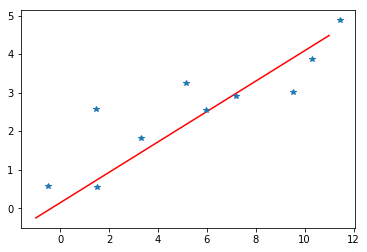

In [233]:
plt.plot(x_test, y_pred, 'r')
plt.plot(x_data, y_label, '*')

**Regression example 2

In [345]:
x_data = np.linspace(0, 10, 1000)
x_data.shape

(1000,)

In [346]:
noise = np.random.randn(len(x_data))
noise.shape

(1000,)

y = m*x + b


In [347]:
m = 0.5 
b = 5

In [348]:
y_true = (m * x_data) + b + noise

In [349]:
import pandas as pd 

In [350]:
x_df = pd.DataFrame(x_data, columns=["x data"])

In [351]:
x_df.head()

,x data
0,0.00000
1,0.01001
2,0.02002
3,0.03003
4,0.04004


In [352]:
y_df = pd.DataFrame(y_true, columns=["y"])

In [353]:
y_df.head()

,y
0,5.115298
1,5.874629
2,5.675526
3,5.283881
4,5.179058


In [354]:
data = pd.concat([x_df, y_df], axis=1)

In [355]:
data.head()

,x data,y
0,0.00000,5.115298
1,0.01001,5.874629
2,0.02002,5.675526
3,0.03003,5.283881
4,0.04004,5.179058


In [356]:
sample_data = data.sample(frac=0.2)

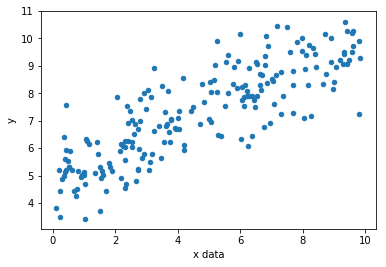

In [357]:
sample_data.plot(kind="scatter", x="x data", y="y")

**Create a batch to feed the data in fractions

In [431]:
batch_size = 16

In [432]:
m = tf.Variable(np.random.randn(1), dtype=tf.float32)
m.dtype

tf.float32_ref

In [433]:
b = tf.Variable(np.random.randn(1), dtype=tf.float32)

In [434]:
xph = tf.placeholder(tf.float32, shape=(batch_size))

In [435]:
yph = tf.placeholder(tf.float32, shape=(batch_size))

In [436]:
y_pred = m*xph + b

In [437]:
error = 0 
error = tf.reduce_sum(tf.square(yph - y_pred))

In [438]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [439]:
train = optimizer.minimize(error)

In [442]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batches = 50
    
    for j in range(2, 20, 2):
        for i in range(batches):
            rand_index = np.random.randint(len(x_data), size=batch_size)
            feed = {xph: x_data[rand_index], yph: y_true[rand_index]}
            sess.run(train, feed_dict=feed)
        print("For batch size", j, " :: Final error = ", sess.run(error, feed_dict=feed))
    
    final_slope, final_intercept = sess.run([m, b])

For batch size 2  :: Final error =  34.250412
For batch size 4  :: Final error =  14.426963
For batch size 6  :: Final error =  15.480916
For batch size 8  :: Final error =  18.777647
For batch size 10  :: Final error =  23.003067
For batch size 12  :: Final error =  10.216213
For batch size 14  :: Final error =  17.11525
For batch size 16  :: Final error =  8.965895
For batch size 18  :: Final error =  7.133848


In [443]:
y_hat = final_slope * x_data + final_intercept

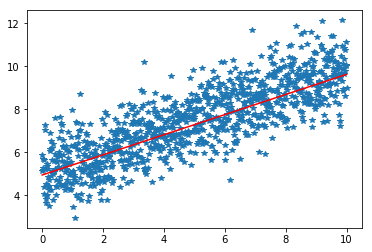

In [451]:
plt.plot(x_data, y_true, '*')


plt.plot(x_data, y_hat, 'r')

**Tensorflow estimator API
- define a list of feature columns
- create the estimator model
- create data input function
- call train, evaluate, predict


In [482]:
# a list of feature columns - here only one column
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ] 

In [483]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpa9z6l4ij', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2399188fd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [484]:
from sklearn.model_selection import train_test_split

In [485]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, train_size=0.7)

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [486]:
print(x_train.shape)

(700,)


In [487]:
print(x_test.shape)

(300,)


The estimator input function acts as a batch size indicator and a feed_dict at the same time.

In [488]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=True)

In [489]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [490]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [493]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa9z6l4ij/model.ckpt-88500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 88500 into /tmp/tmpa9z6l4ij/model.ckpt.
INFO:tensorflow:loss = 11.166122, step = 88501
INFO:tensorflow:global_step/sec: 958.245
INFO:tensorflow:loss = 16.427273, step = 88601 (0.105 sec)
INFO:tensorflow:global_step/sec: 1509.22
INFO:tensorflow:loss = 4.8594418, step = 88701 (0.066 sec)
INFO:tensorflow:global_step/sec: 1199.46
INFO:tensorflow:loss = 7.153511, step = 88801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1175.14
INFO:tensorflow:loss = 9.660673, step = 88901 (0.085 sec)
INFO:tensorflow:global_step/sec: 1759.18
INFO:tensorflow:loss = 10.636692, step = 89001 (0.056 sec)
INFO:tensorflow:global_step/sec: 1645.08
INFO:tensorflow:loss =

In [495]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-27-14:17:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa9z6l4ij/model.ckpt-89500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-27-14:17:53
INFO:tensorflow:Saving dict for global step 89500: average_loss = 1.0032778, global_step = 89500, loss = 8.026222
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 89500: /tmp/tmpa9z6l4ij/model.ckpt-89500


In [496]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-27-14:18:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa9z6l4ij/model.ckpt-89500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-27-14:18:14
INFO:tensorflow:Saving dict for global step 89500: average_loss = 1.016252, global_step = 89500, loss = 8.130016
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 89500: /tmp/tmpa9z6l4ij/model.ckpt-89500


In [498]:
print(train_metrics)

{'average_loss': 1.0032778, 'loss': 8.026222, 'global_step': 89500}


In [499]:
print(test_metrics)

{'average_loss': 1.016252, 'loss': 8.130016, 'global_step': 89500}


In [503]:
new_data_x = np.linspace(0,10,10)
predict_input_func = tf.estimator.inputs.numpy_input_fn({'x':new_data_x}, shuffle=False)

In [505]:
estimator.predict(input_fn=predict_input_func)

<generator object Estimator.predict at 0x7f2393bc1b48>

In [506]:
# Casting it to a list 
list(estimator.predict(input_fn=predict_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa9z6l4ij/model.ckpt-89500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.9996214], dtype=float32)},
 {'predictions': array([5.551298], dtype=float32)},
 {'predictions': array([6.102975], dtype=float32)},
 {'predictions': array([6.6546516], dtype=float32)},
 {'predictions': array([7.206329], dtype=float32)},
 {'predictions': array([7.7580056], dtype=float32)},
 {'predictions': array([8.309683], dtype=float32)},
 {'predictions': array([8.86136], dtype=float32)},
 {'predictions': array([9.413036], dtype=float32)},
 {'predictions': array([9.964713], dtype=float32)}]

In [518]:
predictions = []

In [519]:
for pred in estimator.predict(input_fn=predict_input_func):
    predictions.append(pred['predictions'])  # the 'predictions' is a key to the dictionary we get from estimator predict api

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa9z6l4ij/model.ckpt-89500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [520]:
predictions

[array([4.9996214], dtype=float32),
 array([5.551298], dtype=float32),
 array([6.102975], dtype=float32),
 array([6.6546516], dtype=float32),
 array([7.206329], dtype=float32),
 array([7.7580056], dtype=float32),
 array([8.309683], dtype=float32),
 array([8.86136], dtype=float32),
 array([9.413036], dtype=float32),
 array([9.964713], dtype=float32)]

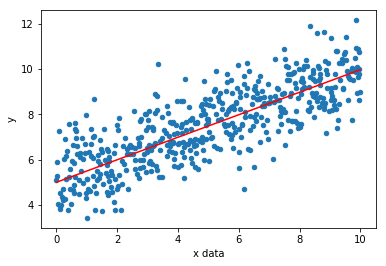

In [524]:
data.sample(500).plot(x='x data', y='y', kind='scatter')
plt.plot(new_data_x, predictions, 'r')

In [530]:
pima = pd.read_csv('pima-data.csv')


In [531]:
pima.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [532]:
pima.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [533]:
cols_to_norm = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'skin']

In [535]:
pima[cols_to_norm] = pima[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [536]:
pima.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,0.353535,True
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0.292929,False
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,0.000000,True
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0.232323,False
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,0.353535,True


In [539]:
# Creature feature columns 
num_preg = tf.feature_column.numeric_column('num_preg')
glucose_conc = tf.feature_column.numeric_column('glucose_conc')
diastolic_bp = tf.feature_column.numeric_column('diastolic_bp')
thickness = tf.feature_column.numeric_column('thickness')
insulin = tf.feature_column.numeric_column('insulin')
bmi = tf.feature_column.numeric_column('bmi')
diab_pred = tf.feature_column.numeric_column('diab_pred')
age = tf.feature_column.numeric_column('age')
skin = tf.feature_column.numeric_column('skin')

In [610]:
# If a categorical feature column was present... 
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('name of the column', hash_bucket_size=<max size - max number of categories you can expect in that column>)

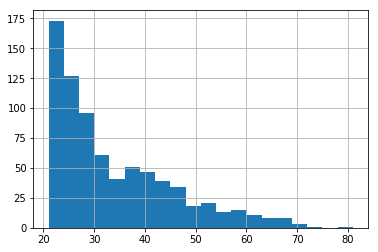

In [611]:
# Convert a continuous value to a categorical value
pima['age'].hist(bins=20)

In [612]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [613]:
pima.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes,False,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,0.353535,True,1,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0.292929,False,1,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,0.000000,True,1,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0.232323,False,1,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,0.353535,True,1,1


In [614]:
feat_cols = [num_preg, glucose_conc, diastolic_bp, thickness, insulin,
       bmi, diab_pred, skin, age_bucket]

In [615]:
feat_cols


[_NumericColumn(key='num_preg', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='glucose_conc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='diastolic_bp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='thickness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='bmi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='diab_pred', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='skin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _BucketizedColumn(source_column=_NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))]

In [616]:
pima.head()
pima.describe()
pima.dtypes

num_preg        float64
glucose_conc    float64
diastolic_bp    float64
thickness       float64
insulin         float64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
False             int64
Group             int64
dtype: object

In [617]:
pima.loc[(pima['diabetes'] == True), 'Group'] = 1
pima.loc[(pima['diabetes'] == False), 'Group'] = 0


In [618]:
from sklearn.model_selection import train_test_split

In [619]:
x_data = pima.drop(labels=['Group', False, 'diabetes'], axis=1)

In [629]:
y_label = pima['Group']

In [630]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.3)

In [631]:
X_train.shape

(537, 9)

In [632]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=8, num_epochs=100, shuffle=True)

In [633]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=8, num_epochs=100, shuffle=False)

In [634]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=8, num_epochs=100, shuffle=False)

In [635]:
estimator = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1odrmcqi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f239392ba90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [636]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1odrmcqi/model.ckpt.
INFO:tensorflow:loss = 5.5451775, step = 1
INFO:tensorflow:global_step/sec: 328.016
INFO:tensorflow:loss = 5.324451, step = 101 (0.305 sec)
INFO:tensorflow:global_step/sec: 873.097
INFO:tensorflow:loss = 3.8737931, step = 201 (0.115 sec)
INFO:tensorflow:global_step/sec: 604.176
INFO:tensorflow:loss = 3.9861298, step = 301 (0.165 sec)
INFO:tensorflow:global_step/sec: 587.145
INFO:tensorflow:loss = 5.44881, step = 401 (0.171 sec)
INFO:tensorflow:global_step/sec: 644.72
INFO:tensorflow:loss = 4.338824, step = 501 (0.156 sec)
INFO:tensorflow:global_step/sec: 597.645
INFO:tensorflow:loss = 4.211676, step = 601 (0.166 sec)
INFO:tensorflow:global_step/sec: 591.728
INFO:tensorflow:loss =

In [638]:
estimator.evaluate(test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-27-17:20:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1odrmcqi/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-27-17:20:45
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7275, accuracy_baseline = 0.640625, auc = 0.7798738, auc_precision_recall = 0.60634923, average_loss = 0.547794, global_step = 1000, label/mean = 0.359375, loss = 4.38235

{'accuracy': 0.7275,
 'accuracy_baseline': 0.640625,
 'auc': 0.7798738,
 'auc_precision_recall': 0.60634923,
 'average_loss': 0.547794,
 'label/mean': 0.359375,
 'loss': 4.382352,
 'precision': 0.6925208,
 'prediction/mean': 0.33226785,
 'recall': 0.4347826,
 'global_step': 1000}

In [639]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=8, num_epochs=1, shuffle=False)

In [640]:
estimator.predict(pred_input_func)

<generator object Estimator.predict at 0x7f2398241620>

In [641]:
list(estimator.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1odrmcqi/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.760239], dtype=float32),
  'logistic': array([0.14676042], dtype=float32),
  'probabilities': array([0.8532396, 0.1467604], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([1.0693945], dtype=float32),
  'logistic': array([0.74448174], dtype=float32),
  'probabilities': array([0.25551826, 0.74448174], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.27730286], dtype=float32),
  'logistic': array([0.43111512], dtype=float32),
  'probabilities': array([0.56888485, 0.43111515], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.72368896], dtype=float32),
  'logistic': array([0.6734188], dtype=float32),
  'probabilities': array([0.32658115, 0.6734188 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.5800432], dtype=float32),
  'logistic': ar

In [644]:
y_pred = []
for i in list(estimator.predict(pred_input_func)):
    y_pred.append(i['classes'].)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1odrmcqi/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [648]:
y_pred

[array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'1'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'0'], dtype=object),
 array([b'

**DNN estimator


In [682]:
dnn_model = tf.estimator.DNNClassifier([50, 40], feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpraqneu6p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f23993cd208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [683]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpraqneu6p/model.ckpt.
INFO:tensorflow:loss = 5.5770354, step = 1
INFO:tensorflow:global_step/sec: 321.762
INFO:tensorflow:loss = 2.6377602, step = 101 (0.311 sec)
INFO:tensorflow:global_step/sec: 324.794
INFO:tensorflow:loss = 6.4074664, step = 201 (0.309 sec)
INFO:tensorflow:global_step/sec: 351.693
INFO:tensorflow:loss = 3.5975838, step = 301 (0.283 sec)
INFO:tensorflow:global_step/sec: 397.637
INFO:tensorflow:loss = 4.2149906, step = 401 (0.251 sec)
INFO:tensorflow:global_step/sec: 334.909
INFO:tensorflow:loss = 3.7788544, step = 501 (0.299 sec)
INFO:tensorflow:global_step/sec: 324.662
INFO:tensorflow:loss = 4.4493613, step = 601 (0.308 sec)
INFO:tensorflow:global_step/sec: 332.732
INFO:tensorflow:

In [684]:
test_metrics = dnn_model.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-27-17:39:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpraqneu6p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-27-17:39:53
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.745, accuracy_baseline = 0.640625, auc = 0.81363916, auc_precision_recall = 0.64309597, average_loss = 0.54888, global_step = 1000, label/mean = 0.359375, loss = 4.39104,

In [685]:
test_metrics

{'accuracy': 0.745,
 'accuracy_baseline': 0.640625,
 'auc': 0.81363916,
 'auc_precision_recall': 0.64309597,
 'average_loss': 0.54888,
 'label/mean': 0.359375,
 'loss': 4.39104,
 'precision': 0.7226667,
 'prediction/mean': 0.2746041,
 'recall': 0.47130436,
 'global_step': 1000}

In [686]:
train_metrics = dnn_model.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-27-17:39:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpraqneu6p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-27-17:39:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.794875, accuracy_baseline = 0.65587497, auc = 0.8797431, auc_precision_recall = 0.80261993, average_loss = 0.42698967, global_step = 1000, label/mean = 0.344125, loss = 3

In [687]:
train_metrics


{'accuracy': 0.794875,
 'accuracy_baseline': 0.65587497,
 'auc': 0.8797431,
 'auc_precision_recall': 0.80261993,
 'average_loss': 0.42698967,
 'label/mean': 0.344125,
 'loss': 3.4159174,
 'precision': 0.8195402,
 'prediction/mean': 0.2727246,
 'recall': 0.5179804,
 'global_step': 1000}